# English Premier League (EPL) Pythagorean Predictor

### This notebook looks at the relationship between points per game(PPG) and the Pythagorean expectation in professional team sports. This was done using English Premier League(EPL) data for the 2017/2018 season.

Pythagorean Expectation is a sports analytics formula devised by Bill James to estimate the percentage of games a baseball team "should" have won based on the number of runs they scored and allowed(wikipedia.com).

## Importing and loading the season data 

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


## The games
The dataframe shows a list of every game in the season. Shows the date, home team, away team, goals scored and the result. To make sure each game is counted as one we must include a count column. 

In [3]:
#Renaming columns and including a count column 
EPL18= EPL18.rename(columns={'FTHG':'HomeScore','FTAG':'AwayScore','FTR':'WinTeam'})
EPL18['count']=1
EPL18

,Date,HomeTeam,AwayTeam,HomeScore,AwayScore,WinTeam,count
0,20170811,Arsenal,Leicester,4,3,H,1
1,20170812,Brighton,Man City,0,2,A,1
2,20170812,Chelsea,Burnley,2,3,A,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,1
4,20170812,Everton,Stoke,1,0,H,1
5,20170812,Southampton,Swansea,0,0,D,1
6,20170812,Watford,Liverpool,3,3,D,1
7,20170812,West Brom,Bournemouth,1,0,H,1
8,20170813,Man United,West Ham,4,0,H,1
9,20170813,Newcastle,Tottenham,0,2,A,1


### Assigning a point system
Each side in the game needs to be given points depending on the results. A win is 3 points, a draw is one point and a loss is no points.

In [4]:
#including points to the results of each game
EPL18['HomePoints']=np.where(EPL18['WinTeam']=='H',3,np.where(EPL18['WinTeam']=='D',1,0))
EPL18['AwayPoints']=np.where(EPL18['WinTeam']=='A',3,np.where(EPL18['WinTeam']=='D',1,0))
EPL18

,Date,HomeTeam,AwayTeam,HomeScore,AwayScore,WinTeam,count,HomePoints,AwayPoints
0,20170811,Arsenal,Leicester,4,3,H,1,3,0
1,20170812,Brighton,Man City,0,2,A,1,0,3
2,20170812,Chelsea,Burnley,2,3,A,1,0,3
3,20170812,Crystal Palace,Huddersfield,0,3,A,1,0,3
4,20170812,Everton,Stoke,1,0,H,1,3,0
5,20170812,Southampton,Swansea,0,0,D,1,1,1
6,20170812,Watford,Liverpool,3,3,D,1,1,1
7,20170812,West Brom,Bournemouth,1,0,H,1,3,0
8,20170813,Man United,West Ham,4,0,H,1,3,0
9,20170813,Newcastle,Tottenham,0,2,A,1,0,3


The season can be broken down into two seperate dataframes. One for 2017 and one for 2018.

In [5]:
#Creating seperate dfs for 2017 games and 2018 games
_2017 = EPL18.query('Date < 20180000')
_2018 = EPL18.query('Date > 20180000')
_2018

,Date,HomeTeam,AwayTeam,HomeScore,AwayScore,WinTeam,count,HomePoints,AwayPoints
209,20180101,Brighton,Bournemouth,2,2,D,1,1,1
210,20180101,Burnley,Liverpool,1,2,A,1,0,3
211,20180101,Everton,Man United,0,2,A,1,0,3
212,20180101,Leicester,Huddersfield,3,0,H,1,3,0
213,20180101,Stoke,Newcastle,0,1,A,1,0,3
214,20180102,Man City,Watford,3,1,H,1,3,0
215,20180102,Southampton,Crystal Palace,1,2,A,1,0,3
216,20180102,Swansea,Tottenham,0,2,A,1,0,3
217,20180102,West Ham,West Brom,2,1,H,1,3,0
218,20180103,Arsenal,Chelsea,2,2,D,1,1,1


## Creating Tables
We now have the neccesary information to formulate the premier league table. We can start with the how the teams performed at home in 2017.

In [6]:
home2017 = _2017.groupby(['HomeTeam'])['count','HomeScore','AwayScore','HomePoints'].sum().reset_index()
home2017 = home2017.rename(columns={'HomeTeam':'Team','count':'GP','HomePoints':'PTS','HomeScore':'GF','AwayScore':'GA'})
home2017 = home2017.sort_values(by=['PTS'], ascending=False)
home2017.set_index('Team', inplace=True)
home2017

,GP,GF,GA,PTS
Team,,,,
Man City,10,36,7,28
Man United,11,24,5,26
Chelsea,11,21,7,25
Arsenal,10,25,10,25
Liverpool,11,21,4,23
Tottenham,10,21,8,21
Everton,10,17,13,19
Burnley,10,7,6,17
Huddersfield,11,10,12,16


Points Earned Away from Home (2017)

In [7]:
away2017 = _2017.groupby(['AwayTeam'])['count','AwayScore','HomeScore','AwayPoints'].sum().reset_index()
away2017 = away2017.rename(columns={'AwayTeam':'Team','count':'GP','AwayPoints':'PTS','HomeScore':'GA','AwayScore':'GF'})
away2017 = away2017.sort_values(by=['PTS'], ascending=False)
away2017.set_index('Team', inplace=True)
away2017

,GP,GF,GA,PTS
Team,,,,
Man City,11,25,5,31
Chelsea,10,18,7,20
Man United,10,19,11,18
Liverpool,10,27,20,18
Burnley,11,11,11,17
Tottenham,10,18,12,16
Leicester,11,18,18,13
Watford,10,16,14,13
Arsenal,11,13,16,13


Points Earned at home in 2018 

In [31]:
home2018 = _2018.groupby(['HomeTeam'])['count','HomeScore','AwayScore','HomePoints'].sum().reset_index()
home2018 = home2018.rename(columns={'HomeTeam':'Team','count':'GP','HomePoints':'PTS','HomeScore':'GF','AwayScore':'GA'})
home2018 = home2018.sort_values(by=['PTS'], ascending=False)
home2018.set_index('Team', inplace=True)
home2018

,GP,GF,GA,PTS
Team,,,,
Arsenal,9,29,10,22
Tottenham,9,19,8,22
Man City,9,25,7,22
Man United,8,14,4,21
Liverpool,8,24,6,20
Newcastle,8,12,4,17
West Ham,10,14,12,16
Everton,9,11,9,15
Brighton,9,14,13,15


Points earned away from home in 2018

In [32]:
away2018 = _2018.groupby(['AwayTeam'])['count','AwayScore','HomeScore','AwayPoints'].sum().reset_index()
away2018 = away2018.rename(columns={'AwayTeam':'Team','count':'GP','AwayPoints':'PTS','HomeScore':'GA','AwayScore':'GF'})
away2018 = away2018.sort_values(by=['PTS'], ascending=False)
away2018.set_index('Team', inplace=True)
away2018

,GP,GF,GA,PTS
Team,,,,
Man City,8,20,8,19
Tottenham,9,16,8,18
Man United,9,11,8,16
Liverpool,9,12,8,14
Chelsea,9,14,15,13
Crystal Palace,9,12,14,12
Burnley,8,9,11,11
Bournemouth,9,13,16,10
Southampton,9,10,15,10


We can now merge the home records, to show the whole season

In [33]:
#Merge the home records
homeRecord = pd.merge(home2017, home2018, on = ['Team'])
homeRecord['GD']=(homeRecord['GF_x']+homeRecord['GF_y']) - (homeRecord['GA_x']+homeRecord['GA_y'])
homeRecord

,GP_x,GF_x,GA_x,PTS_x,GP_y,GF_y,GA_y,PTS_y,GD
Team,,,,,,,,,
Man City,10,36,7,28,9,25,7,22,47
Man United,11,24,5,26,8,14,4,21,29
Chelsea,11,21,7,25,8,9,9,12,14
Arsenal,10,25,10,25,9,29,10,22,34
Liverpool,11,21,4,23,8,24,6,20,35
Tottenham,10,21,8,21,9,19,8,22,24
Everton,10,17,13,19,9,11,9,15,6
Burnley,10,7,6,17,9,9,11,9,-1
Huddersfield,11,10,12,16,8,6,13,7,-9


In [34]:
homeRecord['GP']=homeRecord['GP_x']+homeRecord['GP_y']
homeRecord['GF']=homeRecord['GF_x']+homeRecord['GF_y']
homeRecord['GA']=homeRecord['GA_x']+homeRecord['GA_y']
homeRecord['PTS']=homeRecord['PTS_x']+homeRecord['PTS_y']
homeRecord = homeRecord.groupby(['Team'])['GP','GF','GA','GD','PTS'].sum().reset_index()
homeRecord = homeRecord.sort_values(by=['PTS'], ascending=False)
homeRecord.set_index('Team', inplace=True)
homeRecord

,GP,GF,GA,GD,PTS
Team,,,,,
Man City,19,61,14,47,50
Man United,19,38,9,29,47
Arsenal,19,54,20,34,47
Tottenham,19,40,16,24,43
Liverpool,19,45,10,35,43
Chelsea,19,30,16,14,37
Everton,19,28,22,6,34
Brighton,19,24,25,-1,29
Newcastle,19,21,17,4,28


The Away record for the whole season.

In [40]:
#Merge the away records
awayRecord = pd.merge(away2017, away2018, on = ['Team'])
awayRecord['GD']=(awayRecord['GF_x']+awayRecord['GF_y']) - (awayRecord['GA_x']+awayRecord['GA_y'])
awayRecord

,GP_x,GF_x,GA_x,PTS_x,GP_y,GF_y,GA_y,PTS_y,GD
Team,,,,,,,,,
Man City,11,25,5,31,8,20,8,19,32
Chelsea,10,18,7,20,9,14,15,13,10
Man United,10,19,11,18,9,11,8,16,11
Liverpool,10,27,20,18,9,12,8,14,11
Burnley,11,11,11,17,8,9,11,11,-2
Tottenham,10,18,12,16,9,16,8,18,14
Leicester,11,18,18,13,8,13,20,7,-7
Watford,10,16,14,13,9,1,19,1,-16
Arsenal,11,13,16,13,8,7,15,3,-11


In [41]:
awayRecord['GP']=awayRecord['GP_x']+awayRecord['GP_y']
awayRecord['GF']=awayRecord['GF_x']+awayRecord['GF_y']
awayRecord['GA']=awayRecord['GA_x']+awayRecord['GA_y']
awayRecord['PTS']=awayRecord['PTS_x']+awayRecord['PTS_y']
awayRecord = awayRecord.groupby(['Team'])['GP','GF','GA','GD','PTS'].sum()#.reset_index()
awayRecord = awayRecord.sort_values(by=['PTS'], ascending=False).reset_index()
#awayRecord.set_index('Team', inplace=True)
awayRecord

,Team,GP,GF,GA,GD,PTS
0,Man City,19,45,13,32,50
1,Man United,19,30,19,11,34
2,Tottenham,19,34,20,14,34
3,Chelsea,19,32,22,10,33
4,Liverpool,19,39,28,11,32
5,Burnley,19,20,22,-2,28
6,Leicester,19,31,38,-7,20
7,Crystal Palace,19,16,28,-12,18
8,Bournemouth,19,19,31,-12,18
9,Southampton,19,17,30,-13,17


## Full Premier League Table

In [43]:
#FULL TABLE
fullTable = pd.merge(homeRecord, awayRecord, on = ['Team'])
fullTable['GP']=fullTable['GP_x']+fullTable['GP_y']
fullTable['GF']=fullTable['GF_x']+fullTable['GF_y']
fullTable['GA']=fullTable['GA_x']+fullTable['GA_y']
fullTable['GD']=fullTable['GD_x']+fullTable['GD_y']
fullTable['PTS']=fullTable['PTS_x']+fullTable['PTS_y']
fullTable = fullTable.groupby(['Team'])['GP','GF','GA','GD','PTS'].sum()
fullTable = fullTable.sort_values(by=['PTS'], ascending=False).reset_index()
#fullTable.set_index('Team', inplace=True)
fullTable

,Team,GP,GF,GA,GD,PTS
0,Man City,38,106,27,79,100
1,Man United,38,68,28,40,81
2,Tottenham,38,74,36,38,77
3,Liverpool,38,84,38,46,75
4,Chelsea,38,62,38,24,70
5,Arsenal,38,74,51,23,63
6,Burnley,38,36,39,-3,54
7,Everton,38,44,58,-14,49
8,Leicester,38,56,60,-4,47
9,Crystal Palace,38,45,55,-10,44


## Calculations
We can now run the Pythagorean Expectation(pyth) and see how it translates to points per game(PPG)

In [44]:
# Create points per game and Pythagorean Expectation

fullTable['PPG'] = fullTable['PTS']/fullTable['GP']
fullTable['pyth'] = fullTable['GF']**2/(fullTable['GF']**2 + fullTable['GA']**2)
fullTable

,Team,GP,GF,GA,GD,PTS,PPG,pyth
0,Man City,38,106,27,79,100,2.631579,0.939072
1,Man United,38,68,28,40,81,2.131579,0.855030
2,Tottenham,38,74,36,38,77,2.026316,0.808624
3,Liverpool,38,84,38,46,75,1.973684,0.830118
4,Chelsea,38,62,38,24,70,1.842105,0.726929
5,Arsenal,38,74,51,23,63,1.657895,0.677974
6,Burnley,38,36,39,-3,54,1.421053,0.460064
7,Everton,38,44,58,-14,49,1.289474,0.365283
8,Leicester,38,56,60,-4,47,1.236842,0.465558
9,Crystal Palace,38,45,55,-10,44,1.157895,0.400990


Plotting the data

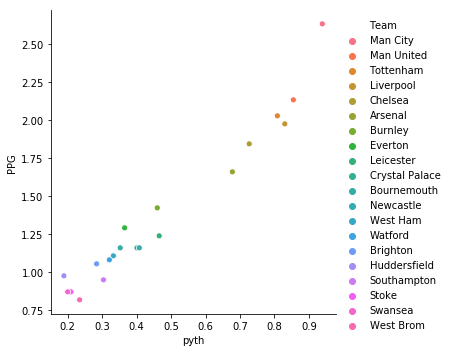

In [47]:
# Plot the data

sns.relplot(x="pyth", y="PPG", data =fullTable, hue='Team')

Regression calculation

In [49]:
# Run the regression

pyth_lm = smf.ols(formula = 'PPG ~ pyth', data=fullTable).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     352.8
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.84e-13
Time:                        23:16:14   Log-Likelihood:                 16.070
No. Observations:                  20   AIC:                            -28.14
Df Residuals:                      18   BIC:                            -26.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4266      0.056      7.572      0.000       0.308       0.545
pyth           2.0144      0.107     18.782      0.000       1.789       2.240
==============================================================================
Omnibus:                        8.300   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.623
Skew:                           1.134   Prob(JB):                       0.0601
Kurtosis:                       4.267   Cond. No.                         5.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion
We have found the Pythagorean Expectation model fits the data well.